In [209]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')

# Load the data directly from the Excel file
data = pd.read_csv('/content/Data_Train.csv')






In [210]:
# Print the first few rows of the data
print(data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR ? DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU ? IXR ? BBI ? BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL ? LKO ? BOM ? COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU ? NAG ? BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR ? NAG ? DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [211]:
# Print the unique values in each categorical column
for i in data.select_dtypes(include='object'):
    print(i, data[i].unique())

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

In [212]:
data = data.rename(columns={'Date_of_Journey': 'Data_of_Journey'})
data.Data_of_Journey = data.Data_of_Journey.str.split('/')

In [213]:
data.columns

Index(['Airline', 'Data_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [214]:
data['Data_of_Journey']

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Data_of_Journey, Length: 10683, dtype: object

In [215]:
data['Date']=data['Data_of_Journey'].str[0]
data['Month']=data['Data_of_Journey'].str[1]
data['Year']=data['Data_of_Journey'].str[2]

In [216]:
data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [217]:
data.Route=data.Route.str.split('->')

In [218]:
data['City1']=data.Route.str[0]
data['City2']=data.Route.str[1]
data['City3']=data.Route.str[2]
data['City4']=data.Route.str[3]
data['City5']=data.Route.str[4]
data['City6']=data.Route.str[5]

In [219]:
data.Dep_Time=data.Dep_Time.str.split(':')

In [220]:
data['Dep_Time_Hour']=data.Dep_Time.str[0]
data['Dep_Time_Mins']=data.Dep_Time.str[1]

In [221]:
data.Arrival_Time=data.Arrival_Time.str.split('')

In [222]:
data['Arrival_date']=data.Arrival_Time.str[1]
data['Time_of_Arrival']=data.Arrival_Time.str[0]

In [223]:
data['Time_of_Arrival']=data.Time_of_Arrival.str.split(':')

In [224]:
data['Arrival_Time_Hour']=data.Time_of_Arrival.str[0]
data['Arrival_Time_Mins']=data.Time_of_Arrival.str[1]

In [225]:
data.Duration=data.Duration.str.split(' ')

In [226]:
data['Travel_Hours']=data.Duration.str[0]
data['Travel_Hours']=data['Travel_Hours'].str.split('h')
data['Travel_Hours']=data['Travel_Hours'].str[0]
data.Travel_Hours=data.Travel_Hours
data["Travel_Mins"]=data.Duration.str[1]

data.Travel_Mins=data.Travel_Mins.str.split('a') 
data.Travel_Mins=data.Travel_Mins.str[0]

In [227]:
data.Total_Stops.replace('non_stop',0,inplace=True)
data.Total_Stops=data.Total_Stops.str.split(' ')
data.Total_Stops=data.Total_Stops.str[0]

In [228]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [229]:
data.Additional_Info.replace('No Info','No info',inplace=True)


In [230]:
data.isnull().sum()

Airline                  0
Data_of_Journey          0
Source                   0
Destination              0
Route                    1
Dep_Time                 0
Arrival_Time             0
Duration                 0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
City4                10683
City5                10683
City6                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [231]:
data.drop(['City4','City5','City6'],axis=1,inplace=True)

In [232]:
# Check if the columns exist in the dataframe
print(data.columns)

# Remove any columns that are not present in the dataframe
columns_to_drop = ['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration']
columns_to_drop = [col for col in columns_to_drop if col in data.columns]

# Drop the columns from the dataframe
data.drop(columns_to_drop, axis=1, inplace=True)

# Check the updated dataframe
print(data.head())



Index(['Airline', 'Data_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Date', 'Month', 'Year', 'City1', 'City2',
       'City3', 'Dep_Time_Hour', 'Dep_Time_Mins', 'Arrival_date',
       'Time_of_Arrival', 'Arrival_Time_Hour', 'Arrival_Time_Mins',
       'Travel_Hours', 'Travel_Mins'],
      dtype='object')
       Airline Data_of_Journey    Source Destination Total_Stops  \
0       IndiGo  [24, 03, 2019]  Banglore   New Delhi    non-stop   
1    Air India   [1, 05, 2019]   Kolkata    Banglore           2   
2  Jet Airways   [9, 06, 2019]     Delhi      Cochin           2   
3       IndiGo  [12, 05, 2019]   Kolkata    Banglore           1   
4       IndiGo  [01, 03, 2019]  Banglore   New Delhi           1   

  Additional_Info  Price Date Month  Year  ... City2  City3  Dep_Time_Hour  \
0         No info   3897   24    03  2019  ...   NaN    NaN             22   
1         No info   7662    1

In [233]:
data.isnull().sum()

Airline                  0
Data_of_Journey          0
Source                   0
Destination              0
Total_Stops              1
Additional_Info          0
Price                    0
Date                     0
Month                    0
Year                     0
City1                    1
City2                10683
City3                10683
Dep_Time_Hour            0
Dep_Time_Mins            0
Arrival_date             0
Time_of_Arrival          0
Arrival_Time_Hour        0
Arrival_Time_Mins    10683
Travel_Hours             0
Travel_Mins           1032
dtype: int64

In [234]:
data['City3'].fillna('None',inplace=True)

In [235]:
data['Arrival_date'].fillna('None',inplace=True)

In [236]:
data['Travel_Mins'].fillna('None',inplace=True)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Airline            10683 non-null  object 
 1   Data_of_Journey    10683 non-null  object 
 2   Source             10683 non-null  object 
 3   Destination        10683 non-null  object 
 4   Total_Stops        10682 non-null  object 
 5   Additional_Info    10683 non-null  object 
 6   Price              10683 non-null  int64  
 7   Date               10683 non-null  object 
 8   Month              10683 non-null  object 
 9   Year               10683 non-null  object 
 10  City1              10682 non-null  object 
 11  City2              0 non-null      float64
 12  City3              10683 non-null  object 
 13  Dep_Time_Hour      10683 non-null  object 
 14  Dep_Time_Mins      10683 non-null  object 
 15  Arrival_date       10683 non-null  object 
 16  Time_of_Arrival    106

In [238]:
data['Travel_Mins'] = data['Travel_Mins'].str.rstrip('m')  # remove 'm' character from the end of each string
data['Travel_Mins'] = data['Travel_Mins'].replace('None', '-1')  # replace 'None' values with -1
data['Travel_Mins'] = data['Travel_Mins'].astype('int64')   # convert to int64 datatype


In [239]:
#data['Total_Stops'] = data['Total_Stops'].astype('int64')
data['Date'] = data['Date'].astype('int64')
data['Month'] = data['Month'].astype('int64')
data['Year'] = data['Year'].astype('int64')
data['Dep_Time_Hour'] = data['Dep_Time_Hour'].astype('int64')
data['Dep_Time_Mins'] = data['Dep_Time_Mins'].astype('int64')
data['Arrival_date'] = data['Arrival_date'].astype('int64')
data['Arrival_Time_Mins'] = data['Arrival_Time_Mins'].fillna(-1).astype('int64')
#data['Travel_Hours'] = data['Travel_Hours'].astype('int64')
data['Travel_Mins'] = data['Travel_Mins'].astype('int64')


In [240]:
data[data['Travel_Hours']=='5']

,Airline,Data_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,...,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,1,No info,6218,12,5,2019,...,NaN,None,18,5,2,[],,-1,5,25
20,GoAir,"[6, 03, 2019]",Delhi,Cochin,1,No info,19495,6,3,2019,...,NaN,None,14,10,1,[],,-1,5,10
26,IndiGo,"[1, 06, 2019]",Delhi,Cochin,1,No info,8238,1,6,2019,...,NaN,None,21,50,0,[],,-1,5,45
27,GoAir,"[15, 05, 2019]",Delhi,Cochin,1,No info,7682,15,5,2019,...,NaN,None,7,0,1,[],,-1,5,55
34,Jet Airways,"[18, 05, 2019]",Delhi,Cochin,1,In-flight meal not included,12373,18,5,2019,...,NaN,None,7,5,1,[],,-1,5,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10603,IndiGo,"[9, 06, 2019]",Delhi,Cochin,1,No info,5636,9,6,2019,...,NaN,None,2,0,0,[],,-1,5,25
10619,IndiGo,"[27, 04, 2019]",Delhi,Cochin,1,No info,6307,27,4,2019,...,NaN,None,21,50,0,[],,-1,5,45
10628,SpiceJet,"[9, 05, 2019]",Kolkata,Banglore,1,No info,8224,9,5,2019,...,NaN,None,15,55,2,[],,-1,5,30
10631,IndiGo,"[15, 05, 2019]",Delhi,Cochin,1,No info,6037,15,5,2019,...,NaN,None,2,0,0,[],,-1,5,45


In [241]:
data.drop(index=6474,inplace=True,axis=0)

In [242]:
data.Travel_Hours=data.Travel_Hours.astype('int64')

Label Encoding

In [243]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [244]:
data.Airline=le.fit_transform(data.Airline)
data.Source=le.fit_transform(data.Source) 
data.Destination=le.fit_transform(data.Destination)
data.Total_Stops=le.fit_transform(data.Total_Stops) 
data.Cityl=le.fit_transform(data.City1) 
data.City2=le.fit_transform(data.City2)
data.City3=le.fit_transform(data.City3) 
data.Additional_Info=le.fit_transform(data. Additional_Info)
data.head()

,Airline,Data_of_Journey,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,...,City2,City3,Dep_Time_Hour,Dep_Time_Mins,Arrival_date,Time_of_Arrival,Arrival_Time_Hour,Arrival_Time_Mins,Travel_Hours,Travel_Mins
0,3,"[24, 03, 2019]",0,5,4,7,3897,24,3,2019,...,0,0,22,20,0,[],,-1,2,50
1,1,"[1, 05, 2019]",3,0,1,7,7662,1,5,2019,...,0,0,5,50,1,[],,-1,7,25
2,4,"[9, 06, 2019]",2,1,1,7,13882,9,6,2019,...,0,0,9,25,0,[],,-1,19,-1
3,3,"[12, 05, 2019]",3,0,0,7,6218,12,5,2019,...,0,0,18,5,2,[],,-1,5,25
4,3,"[01, 03, 2019]",0,5,0,7,13302,1,3,2019,...,0,0,16,50,2,[],,-1,4,45


In [245]:
data = data[['Airline','Source','Destination','Date','Month','Year','Dep_Time_Hour','Dep_Time_Mins','Dep_Time_Mins','Arrival_date','Arrival_Time_Hour','Arrival_Time_Mins','Price']]

In [246]:
data.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Dep_Time_Mins,Arrival_date,Arrival_Time_Hour,Arrival_Time_Mins,Price
0,3,0,5,24,3,2019,22,20,20,0,,-1,3897
1,1,3,0,1,5,2019,5,50,50,1,,-1,7662
2,4,2,1,9,6,2019,9,25,25,0,,-1,13882
3,3,3,0,12,5,2019,18,5,5,2,,-1,6218
4,3,0,5,1,3,2019,16,50,50,2,,-1,13302


In [247]:
data.describe()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins,Price
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000
mean,3.966205,1.952069,1.435967,13.509081,4.708762,2019.0,12.490358,24.408819,24.408819,0.896836,-1.0,9086.292735
std,2.352090,1.177110,1.474773,8.479363,1.164294,0.0,5.748819,18.767225,18.767225,0.711845,0.0,4610.885695
min,0.000000,0.000000,0.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,-1.0,1759.000000
25%,3.000000,2.000000,0.000000,6.000000,3.000000,2019.0,8.000000,5.000000,5.000000,0.000000,-1.0,5277.000000
50%,4.000000,2.000000,1.000000,12.000000,5.000000,2019.0,11.000000,25.000000,25.000000,1.000000,-1.0,8372.000000
75%,4.000000,3.000000,2.000000,21.000000,6.000000,2019.0,18.000000,40.000000,40.000000,1.000000,-1.0,12373.000000
max,11.000000,4.000000,5.000000,27.000000,6.000000,2019.0,23.000000,55.000000,55.000000,2.000000,-1.0,79512.000000


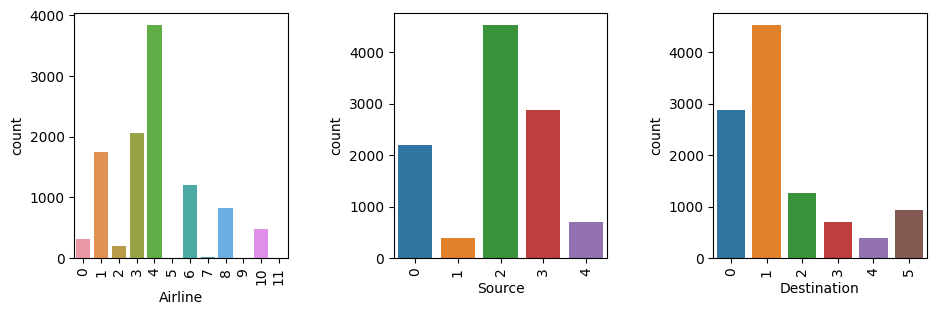

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical variables
categorical = ['Airline', 'Source', 'Destination', 'Additional_Info', 'City1']

# Create a plot for each categorical variable
c = 1
plt.figure(figsize=(10,20))
for i in data.columns: 
    if i in categorical:
        plt.subplot(6,3,c)
        sns.countplot(x=data[i])
        plt.xticks(rotation=90)
        plt.tight_layout(pad=3.0)
        c=c+1  
plt.show()


<Axes: xlabel='Price', ylabel='Density'>

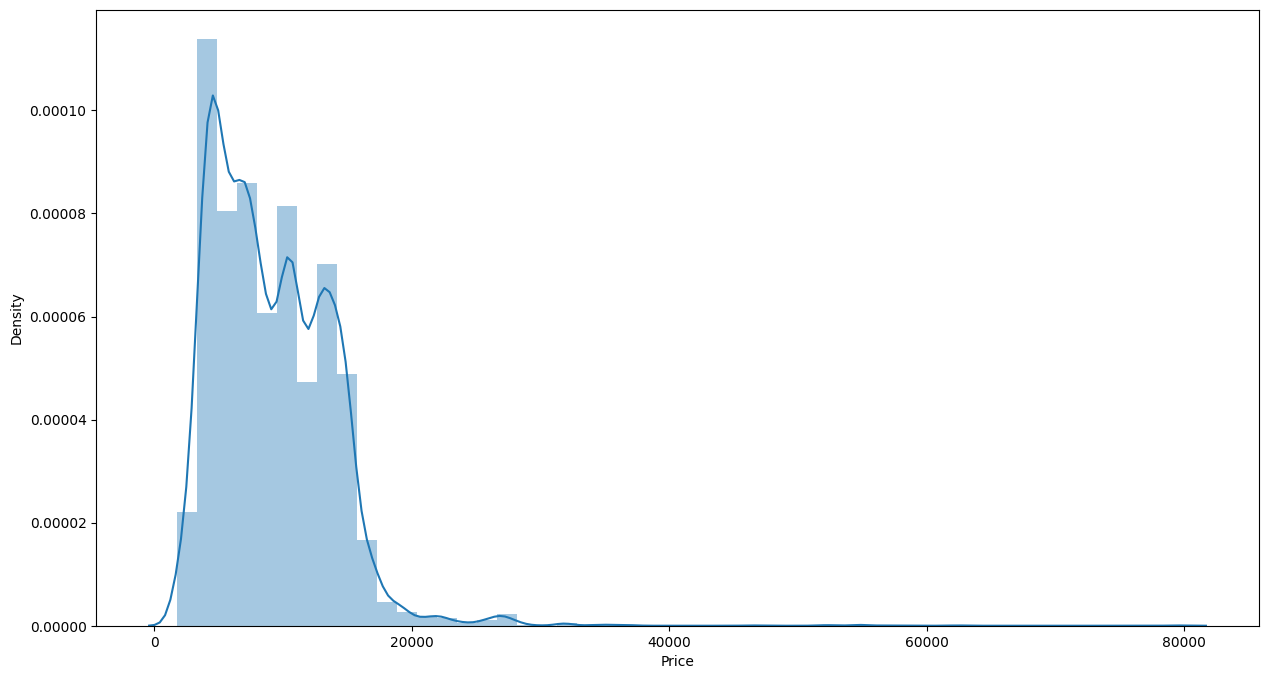

In [249]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.distplot(data['Price'])


<Axes: >

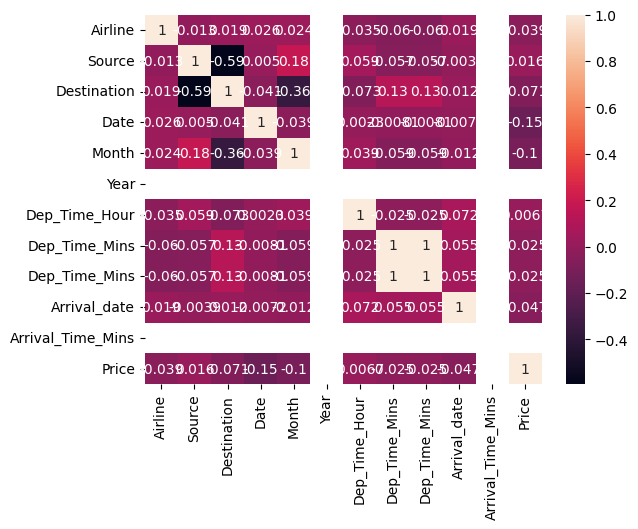

In [250]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

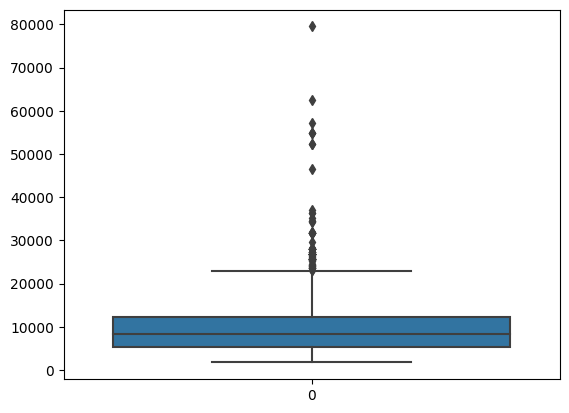

In [251]:
import seaborn as sns 
sns.boxplot(data['Price'])

In [252]:
y = data['Price']
x = data.drop(columns=['Price','Arrival_Time_Hour'],axis=1)

In [253]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()



In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Airline            10682 non-null  int64 
 1   Source             10682 non-null  int64 
 2   Destination        10682 non-null  int64 
 3   Date               10682 non-null  int64 
 4   Month              10682 non-null  int64 
 5   Year               10682 non-null  int64 
 6   Dep_Time_Hour      10682 non-null  int64 
 7   Dep_Time_Mins      10682 non-null  int64 
 8   Dep_Time_Mins      10682 non-null  int64 
 9   Arrival_date       10682 non-null  int64 
 10  Arrival_Time_Hour  10682 non-null  object
 11  Arrival_Time_Mins  10682 non-null  int64 
 12  Price              10682 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.4+ MB


In [255]:
x_scaled = ss.fit_transform(x)

In [256]:
x_scaled = pd.DataFrame(x_scaled)
x_scaled.head()


,0,1,2,3,4,5,6,7,8,9,10
0,-0.410805,-1.658435,2.416778,1.237288,-1.467707,0.0,1.654268,-0.234932,-0.234932,-1.259934,0.0
1,-1.261152,0.890299,-0.973732,-1.475307,0.250153,0.0,-1.303000,1.363674,1.363674,0.144932,0.0
2,0.014369,0.040721,-0.295630,-0.531796,1.109082,0.0,-0.607172,0.031502,0.031502,-1.259934,0.0
3,-0.410805,0.890299,-0.973732,-0.177979,0.250153,0.0,0.958440,-1.034235,-1.034235,1.549798,0.0
4,-0.410805,-1.658435,2.416778,-1.475307,-1.467707,0.0,0.610527,1.363674,1.363674,1.549798,0.0


In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [258]:
x_train.head()

,Airline,Source,Destination,Date,Month,Year,Dep_Time_Hour,Dep_Time_Mins,Dep_Time_Mins,Arrival_date,Arrival_Time_Mins
10005,6,2,1,27,5,2019,8,30,30,1,-1
3684,4,2,1,9,5,2019,11,30,30,1,-1
1034,8,2,1,24,4,2019,15,45,45,2,-1
3909,6,2,1,21,3,2019,12,50,50,0,-1
3088,1,2,1,24,6,2019,17,15,15,1,-1


In [259]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
rfr=RandomForestRegressor()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()

In [260]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for i in [rfr, gb, ad]:
    i.fit(x_train, y_train)
    y_pred = i.predict(x_test)
    test_score = r2_score(y_test, y_pred)
    train_score = r2_score(y_train, i.predict(x_train))
    
    if abs(train_score - test_score) <= 0.2:
        print(i)
        print("R2 score is", test_score)
        print("R2 for train data", train_score)
        print("Mean Absolute Error is", mean_absolute_error(y_pred, y_test))
        print("Mean Squared Error is", mean_squared_error(y_pred, y_test))
        print("Root Mean Absolute Error is", mean_squared_error(y_pred, y_test, squared=False))


RandomForestRegressor()
R2 score is 0.8325520358773889
R2 for train data 0.9166123223251975
Mean Absolute Error is 1256.497222168674
Mean Squared Error is 3539686.186451974
Root Mean Absolute Error is 1881.4053753649089
GradientBoostingRegressor()
R2 score is 0.7583288549036917
R2 for train data 0.7201256296668721
Mean Absolute Error is 1702.9792974505065
Mean Squared Error is 5108691.6370930085
Root Mean Absolute Error is 2260.241499728073
AdaBoostRegressor()
R2 score is 0.3711750822091294
R2 for train data 0.37336980573966616
Mean Absolute Error is 2858.7024368008133
Mean Squared Error is 13292743.730053985
Root Mean Absolute Error is 3645.9215200075255


In [261]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

knn=KNeighborsRegressor()
svr=SVR()
dt=DecisionTreeRegressor()
for i in [knn,svr,dt]: 
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test) 
    test_score=r2_score (y_test,y_pred)
    train_score=r2_score(y_train,i.predict(x_train))
    if abs(train_score-test_score)<=0.1: 
        print(i)
        print('R2 Score is',r2_score(y_test,y_pred))
        print('R2 Score for train data',r2_score(y_train,i.predict(x_train))) 
        print('Mean Absolute Error is', mean_absolute_error(y_test,y_pred))
        print('Mean Squared Error is',mean_squared_error(y_test,y_pred)) 
        print('Root Mean Squared Error is', (mean_squared_error(y_test,y_pred,squared=False)))

SVR()
R2 Score is -0.03013354967209958
R2 Score for train data -0.023073979568290603
Mean Absolute Error is 3629.626455858667
Mean Squared Error is 21776015.701839704
Root Mean Squared Error is 4666.477868997099


In [262]:
from sklearn.model_selection import cross_val_score
for i in range(2,5):
    cv=cross_val_score(rfr,x,y,cv=i)
    print(rfr,cv.mean())

RandomForestRegressor() 0.7695420864786802
RandomForestRegressor() 0.7630071648975146
RandomForestRegressor() 0.778953794853236


In [263]:
from sklearn.model_selection import RandomizedSearchCV

In [264]:
param_grid={'n_estimators': [10,30,50,70,100],"max_depth": [None,1,2,3],
'max_features':['auto', 'sqrt']}
rfr=RandomForestRegressor()
rf_res=RandomizedSearchCV(estimator=rfr, param_distributions=param_grid,cv=3,verbose=2,n_jobs=-1)

rf_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [265]:
gb=GradientBoostingRegressor()
gb_res=RandomizedSearchCV(estimator=gb, param_distributions=param_grid, cv=3, verbose=2,n_jobs=-1)

gb_res.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 1, 2, 3],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 30, 50, 70, 100]},
                   verbose=2)

In [266]:
rfr=RandomForestRegressor(n_estimators=10,max_features="sqrt",max_depth=None)
rfr.fit(x_train,y_train)
y_train_pred=rfr.predict(x_train)
y_test_pred=rfr.predict(x_test)
print("train accuracy",r2_score(y_train_pred,y_train)) 
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8930239693629554
test accuracy 0.7753610012017177


In [267]:
knn=KNeighborsRegressor (n_neighbors=2, algorithm="auto", metric_params=None,n_jobs=-1)
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train) 
y_test_pred=knn.predict(x_test)
print("train accuracy", r2_score (y_train_pred,y_train))
print("test accuracy",r2_score(y_test_pred,y_test))

train accuracy 0.8034721955397092
test accuracy 0.4700282382957821


In [268]:
Price=y_train_pred

In [269]:
price_list=pd.DataFrame({'Price':Price})

In [270]:
price_list

,Price
0,9232.0
1,13963.5
2,5583.0
3,7590.0
4,11980.5
...,...
8540,12347.0
8541,14781.0
8542,7968.0
8543,4449.0


In [271]:
import pickle
pickle.dump(rfr,open('model1.pkl','wb'))